In [1]:
import numpy as np
import cv2
from ocamcamera import OcamCamera
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
%matplotlib inline

In [2]:
# # show document
# help(OcamCamera)

## Load ocamcalib file

In [3]:
ocam_file = '../ocamcamera/calib_results_0.txt'
img = cv2.imread('../ocamcamera/img0.jpg')[:,:,::-1]
ocam = OcamCamera(ocam_file, fov=185)
print(ocam)

pol: [-471.4441, 0.0, 0.0007356108, -3.773045e-07, 5.800006e-10]
invpol: [772.40547, 504.754051, 7.034666, 45.32718, 54.65157, 0.458049, -7.873745, 15.588713, 13.743404, 2.968883]
xc(col dir): 794.308657, 	yc(row dir): 798.175741 in Ocam coord
affine: [1.000305, -0.000277, -0.000925]
img_size: (1600, 1600)
fov: 185


## Original fisheye image

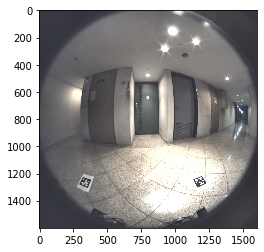

In [4]:
plt.imshow(img)

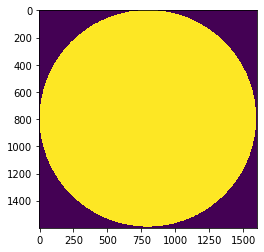

In [5]:
valid = ocam.valid_area()
plt.imshow(valid)

## Perspective projection

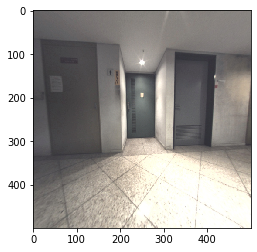

In [6]:
W = 500
H = 500
z = W/3.0
x = [i-W/2 for i in range(W)]
y = [j-H/2 for j in range(H)]
x_grid, y_grid = np.meshgrid(x, y, sparse=False, indexing='xy')
point3D = np.stack([x_grid, y_grid, np.full_like(x_grid, z)]).reshape(3, -1)
mapx, mapy = ocam.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out = cv2.remap(img, mapx, mapy,cv2.INTER_LINEAR)
plt.imshow(out)

## Equirectangular projection

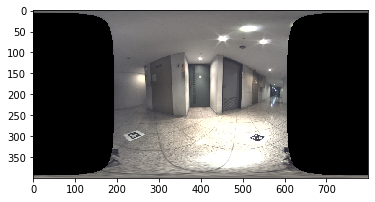

In [7]:
W = 800
H = 400
th = np.pi/H
p = 2*np.pi/W
phi = [-np.pi + (i+0.5)*p for i in range(W)]
theta = [-np.pi/2 + (i+0.5)*th for i in range(H)]
phi_xy, theta_xy  = np.meshgrid(phi, theta, sparse=False, indexing='xy')
point3D = np.stack([np.sin(phi_xy)*np.cos(theta_xy), np.sin(theta_xy), np.cos(phi_xy)*np.cos(theta_xy)]).reshape(3, -1)
mapx, mapy = ocam.world2cam(point3D)
mapx = mapx.reshape(H, W)
mapy = mapy.reshape(H, W)
out = cv2.remap(img, mapx, mapy,cv2.INTER_LINEAR)
plt.imshow(out)